# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
import pandas as pd
import numpy as np
import requests as r
import json

In [2]:
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

In [4]:
response = r.get(url)
print(response)

<Response [200]>


In [5]:
with open('image.tsv','wb') as file:
    file.write(response.content)

In [6]:
images = pd.read_csv('image.tsv', sep='\t')

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [7]:
tweets = []

with open('tweet-json.txt','r') as file:
    for line in file:
        data = json.loads(line)
        tweets.append(data)
        
add_data = pd.DataFrame(tweets, columns=['id','retweet_count','favorite_count'])        

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [8]:
twitter_archive.head(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [9]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [10]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [11]:
twitter_archive[twitter_archive['rating_denominator']!=10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None


In [12]:
twitter_archive[twitter_archive['rating_numerator']>=100]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None
290,838150277551247360,8.381455e+17,2.195506e+07,2017-03-04 22:12:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@markhoppus 182/10,NaN,NaN,NaN,NaN,182,10,None,None,None,None,None
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
979,749981277374128128,NaN,NaN,2016-07-04 15:00:45 +0000,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749981277...,1776,10,Atticus,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1634,684225744407494656,6.842229e+17,4.196984e+09,2016-01-05 04:11:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Two sneaky puppers were not initially seen, mo...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/684225744...,143,130,None,None,None,None,None
1635,684222868335505415,NaN,NaN,2016-01-05 04:00:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Someone help the girl is being mugged. Several...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/684222868...,121,110,None,None,None,None,None
1779,677716515794329600,NaN,NaN,2015-12-18 05:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",IT'S PUPPERGEDDON. Total of 144/120 ...I think...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/677716515...,144,120,None,None,None,None,None


In [13]:
twitter_archive['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [15]:
twitter_archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [16]:
twitter_archive[['doggo','puppo','pupper','floofer']].sample(10)

,doggo,puppo,pupper,floofer
2299,None,None,None,None
662,None,None,None,None
1490,None,None,None,None
1843,None,None,None,None
1025,None,None,None,None
1906,None,None,None,None
1724,None,None,None,None
1208,None,None,None,None
1126,None,None,None,None
968,None,None,None,None


In [17]:
add_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
id                2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [18]:
add_data.sample(10)

,id,retweet_count,favorite_count
2004,672267570918129665,666,1588
1876,675047298674663426,366,1141
1991,672609152938721280,424,1180
1889,674764817387900928,263,852
2027,671855973984772097,502,977
1127,729463711119904772,2586,6340
294,837471256429613056,2631,13967
1067,740365076218183684,495,2727
1720,680115823365742593,1028,2972
1642,683852578183077888,397,2111


In [19]:
images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [20]:
images.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1753,824663926340194305,https://pbs.twimg.com/media/C3HLd0HXUAAUI2b.jpg,1,English_setter,0.526488,True,golden_retriever,0.402815,True,Irish_setter,0.034418,True
1299,752519690950500352,https://pbs.twimg.com/media/CnF8qVDWYAAh0g1.jpg,3,swing,0.999984,False,Labrador_retriever,0.000010,True,Eskimo_dog,0.000001,True
504,675888385639251968,https://pbs.twimg.com/media/CWE85snWIAEG5ES.jpg,1,West_Highland_white_terrier,0.672117,True,Old_English_sheepdog,0.146147,True,komondor,0.023141,True
1416,771136648247640064,https://pbs.twimg.com/media/CrOgsIBWYAA8Dtb.jpg,1,bathtub,0.368660,False,golden_retriever,0.297402,True,tub,0.201711,False
653,682047327939461121,https://pbs.twimg.com/media/CXcebTeWsAUQJ-J.jpg,1,teddy,0.364095,False,doormat,0.119243,False,toyshop,0.035127,False
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
1653,809920764300447744,https://pbs.twimg.com/media/Cz1qo05XUAQ4qXp.jpg,1,Norwich_terrier,0.397163,True,toy_poodle,0.274540,True,miniature_poodle,0.134667,True
102,667801013445750784,https://pbs.twimg.com/media/CUSBemVUEAAn-6V.jpg,1,flat-coated_retriever,0.508392,True,Chesapeake_Bay_retriever,0.262239,True,curly-coated_retriever,0.048920,True
1362,761292947749015552,https://pbs.twimg.com/media/CpCn5aXXgAAOPTm.jpg,1,standard_poodle,0.660893,True,Samoyed,0.314886,True,miniature_poodle,0.008834,True
953,705102439679201280,https://pbs.twimg.com/media/CckG63qUsAALbIr.jpg,1,collie,0.457672,True,chow,0.279101,True,Pomeranian,0.076922,True


### Quality issues
1. twitter_archive: Timestamp has a data type object rather than datetime format

2. twitter_archive: Some rows have atributes (text, ratings) not relating to dogs

3. twitter_archive: Dropping 'in_reply_to_status_id' and 'in_reply_to_user_id' since the have 77 non-null values and also dropping retweeted_status_id,retweeted_status_user_id, and retweeted_status_timestamp since they also have 172 non-null values

4. twitter_archive: Drop rows with rating_denominator not equivalent to 10 

5. twitter_archive: Extract source of tweet from html anchor tags

6. twitter_archive: Converting all 'None' values to 'NaN'

7. twitter_archive: Dropping columns that will not be needed

8. images: most rows with p1_dog or p2_dog or p3_dog as False were not related to dogs

### Tidiness issues
1. twitter_archive: One variable in four columns (doggo,puppo,pupper, and floofer) 

2. twitter_archive: two variables in six columns (p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog) 

3. Merging all datasets to form a single table

## Cleaning Data


In [21]:
# Making copies of original pieces of data
twitter_archive_clean = twitter_archive.copy()
images_clean = images.copy()
add_data_clean = add_data.copy()

### Tidiness

#### One variable in four columns (doggo,puppo,pupper, and floofer)

#### Define

Replace all the None values with NaN in the four columns and drop the null values using .dropna() and join the remaining values in each row with a comma and assign them to the a new column called 'dog_stage' also replace all missing values with NaN. And finally drop the four columns.

#### Code

In [22]:
# list of the four columns 
dog_stage = ['doggo', 'floofer', 'pupper', 'puppo']

twitter_archive_clean[dog_stage] = twitter_archive_clean[dog_stage].replace('None', np.nan)

def join(breed):
    return ', '.join(breed.dropna().astype(str))

twitter_archive_clean['dog_stage'] = twitter_archive_clean[dog_stage].apply(join, axis=1)

twitter_archive_clean['dog_stage'] = twitter_archive_clean['dog_stage'].replace('',np.nan)

In [23]:
# generating a function to drop rows and columns
def drop_values(df, values, axis=0):
    '''
    drop values in specified region of a dataframe
    '''
    df.drop(values, axis=axis, inplace=True)

    
drop_values(twitter_archive_clean, dog_stage, axis=1)

#### Test

In [24]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
dog_stage                     380 non-null object
dtypes: float64(4), int64(3), object(7)
memory usage: 257.8+ KB


In [25]:
twitter_archive_clean.dog_stage.value_counts()

pupper            245
doggo              83
puppo              29
doggo, pupper      12
floofer             9
doggo, puppo        1
doggo, floofer      1
Name: dog_stage, dtype: int64

#### two variables in six columns (p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog)

#### Define

The six columns (p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog) will be turned into two new columns named 'breed' and 'confidence' using the .select()

#### Code

In [26]:
condition = [(images_clean['p1_dog'] == True),(images_clean['p2_dog'] == True),(images_clean['p3_dog'] == True)]

breed = [images_clean['p1'], images_clean['p2'], images_clean['p3']]

p_conf = [images_clean['p1_conf'], images_clean['p2_conf'], images_clean['p3_conf']]

images_clean['breed'] = np.select(condition, breed, default='None')

images_clean['p_confidence'] = np.select(condition, p_conf, default=0)

In [27]:
images_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 14 columns):
tweet_id        2075 non-null int64
jpg_url         2075 non-null object
img_num         2075 non-null int64
p1              2075 non-null object
p1_conf         2075 non-null float64
p1_dog          2075 non-null bool
p2              2075 non-null object
p2_conf         2075 non-null float64
p2_dog          2075 non-null bool
p3              2075 non-null object
p3_conf         2075 non-null float64
p3_dog          2075 non-null bool
breed           2075 non-null object
p_confidence    2075 non-null float64
dtypes: bool(3), float64(4), int64(2), object(5)
memory usage: 184.5+ KB


In [28]:
p_images = ['p1','p1_conf','p1_dog','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog']

drop_values(images_clean, p_images, axis=1)

#### Test

In [29]:
images_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 5 columns):
tweet_id        2075 non-null int64
jpg_url         2075 non-null object
img_num         2075 non-null int64
breed           2075 non-null object
p_confidence    2075 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 81.1+ KB


#### Merging all datasets to form a single table

#### Define

Merge the add_data and images datasets to the twitter_archive on tweet_id and id in a final dataset called df

#### Code

In [30]:
combined = pd.merge(twitter_archive_clean, images_clean, on='tweet_id',  how='left')

df = pd.merge(combined, add_data_clean, left_on='tweet_id',right_on='id',how='left' )

#### Test

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 21 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
dog_stage                     380 non-null object
jpg_url                       2075 non-null object
img_num                       2075 non-null float64
breed                         2075 non-null object
p_confidence                  20

### Quality 

#### timestamp has a object datatype rather than datetime format

#### Define
Convert timestamp datatype from object to datetime using .to_datetime()

#### Code

In [32]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

#### Test

In [33]:
df.timestamp.head()

0   2017-08-01 16:23:56
1   2017-08-01 00:17:27
2   2017-07-31 00:18:03
3   2017-07-30 15:58:51
4   2017-07-29 16:00:24
Name: timestamp, dtype: datetime64[ns]

#### Some rows have atributes (text, ratings) not relating to dogs

#### Define

Query all rows with atributes(text, ratings) not relating to dogs and drop them

#### Code

In [34]:
# getting a list consisting of the index of all rows that do not relate to dogs
not_dog  = df[df['text'].str.match('.*only rate dog')].index

#dropping the rows in the list 

drop_values(df, not_dog)


#### Test 

In [35]:
# this code should produce an empty list
not_dog


Int64Index([  25,   59,   93,  118,  127,  131,  141,  154,  169,  193,  221,
             226,  246,  314,  386,  390,  411,  416,  419,  494,  506,  521,
             538,  542,  732,  744,  759,  773,  801,  819,  841,  869,  887,
             890, 1017, 1031, 1071, 1077, 1085, 1090, 1097, 1102, 1121, 1150,
            1193, 1207, 1225, 1234, 1290, 1356, 1362, 1385, 1435, 1527, 1564,
            1610, 1693, 1699, 1726, 1737, 1745, 1854, 1877, 1938],
           dtype='int64')

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2292 entries, 0 to 2355
Data columns (total 21 columns):
tweet_id                      2292 non-null int64
in_reply_to_status_id         77 non-null float64
in_reply_to_user_id           77 non-null float64
timestamp                     2292 non-null datetime64[ns]
source                        2292 non-null object
text                          2292 non-null object
retweeted_status_id           172 non-null float64
retweeted_status_user_id      172 non-null float64
retweeted_status_timestamp    172 non-null object
expanded_urls                 2233 non-null object
rating_numerator              2292 non-null int64
rating_denominator            2292 non-null int64
name                          2292 non-null object
dog_stage                     380 non-null object
jpg_url                       2017 non-null object
img_num                       2017 non-null float64
breed                         2017 non-null object
p_confidence            

#### Droping columns with outrageous number of null values

#### Define 

Dropping 'in_reply_to_status_id' and 'in_reply_to_user_id' since the have 77 non-null values. Also dropping retweeted_status_id,retweeted_status_user_id, and retweeted_status_timestamp since they also have 172 non-null values. 

#### Code

In [37]:
#index of the 77 non-null values
reply = df[df['in_reply_to_status_id'].notnull()].index

#index of the 172 non-null values
retweeted = df[df['retweeted_status_id'].notnull()].index

#dropping row containing 77 non-null values
drop_values(df,reply)

#dropping rows containing 172 non-null values
drop_values(df, retweeted)

In [38]:
# list of the columns to drop
outrageous_null = ['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp','in_reply_to_status_id','in_reply_to_user_id']

# dropping columns 
drop_values( df, outrageous_null, axis=1)

#### Test

In [39]:
# should produce an empty list 
reply

Int64Index([  30,   55,   64,  113,  148,  149,  179,  184,  186,  188,  189,
             218,  228,  234,  251,  274,  290,  291,  313,  342,  346,  387,
             409,  427,  498,  513,  565,  570,  576,  611,  701,  843,  857,
             967, 1005, 1016, 1018, 1080, 1127, 1295, 1330, 1339, 1345, 1446,
            1452, 1464, 1474, 1479, 1497, 1501, 1523, 1598, 1605, 1618, 1630,
            1634, 1663, 1689, 1774, 1819, 1842, 1844, 1852, 1866, 1882, 1885,
            1892, 1895, 1905, 1914, 1940, 2036, 2038, 2149, 2169, 2189, 2298],
           dtype='int64')

In [40]:
# should produce an empty list
retweeted

Int64Index([  19,   32,   36,   68,   73,   74,   78,   91,   95,   97,
            ...
             926,  937,  943,  949, 1012, 1023, 1043, 1242, 2259, 2260],
           dtype='int64', length=172)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2043 entries, 0 to 2355
Data columns (total 16 columns):
tweet_id              2043 non-null int64
timestamp             2043 non-null datetime64[ns]
source                2043 non-null object
text                  2043 non-null object
expanded_urls         2040 non-null object
rating_numerator      2043 non-null int64
rating_denominator    2043 non-null int64
name                  2043 non-null object
dog_stage             336 non-null object
jpg_url               1917 non-null object
img_num               1917 non-null float64
breed                 1917 non-null object
p_confidence          1917 non-null float64
id                    2043 non-null float64
retweet_count         2043 non-null float64
favorite_count        2043 non-null float64
dtypes: datetime64[ns](1), float64(5), int64(3), object(7)
memory usage: 271.3+ KB


#### Extract source of tweet from html anchor tags

#### Define

Extract the sources from the html tags using .extract with regular exxpressions

#### Code

In [42]:
df['source'] = df['source'].str.extract('^<a.+>(.+)</a>$')

#### Test

In [43]:
df['source'].value_counts()

Twitter for iPhone     1911
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                10
Name: source, dtype: int64

In [44]:
df.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,breed,p_confidence,id,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,None,0.000000,8.924206e+17,8853.0,39467.0
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,8.921774e+17,6514.0,33819.0
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,0.716012,8.918152e+17,4328.0,25461.0
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,Labrador_retriever,0.168086,8.916896e+17,8964.0,42908.0
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,0.555712,8.913276e+17,9774.0,41048.0


#### Dropping columns that will not be needed

#### Define

Dropping text, expanded_urls, and jpg_url using the drop_values funtion  

#### Code

In [45]:
# list of values to be dropped
irrelevant_columns = ['text','expanded_urls','jpg_url','name','img_num']

#dropping irrelevant_columns
drop_values (df, irrelevant_columns, axis = 1)

#### Test

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2043 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              2043 non-null int64
timestamp             2043 non-null datetime64[ns]
source                2043 non-null object
rating_numerator      2043 non-null int64
rating_denominator    2043 non-null int64
dog_stage             336 non-null object
breed                 1917 non-null object
p_confidence          1917 non-null float64
id                    2043 non-null float64
retweet_count         2043 non-null float64
favorite_count        2043 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(3), object(3)
memory usage: 191.5+ KB


In [47]:
df.head()

,tweet_id,timestamp,source,rating_numerator,rating_denominator,dog_stage,breed,p_confidence,id,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,13,10,NaN,None,0.000000,8.924206e+17,8853.0,39467.0
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,13,10,NaN,Chihuahua,0.323581,8.921774e+17,6514.0,33819.0
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,12,10,NaN,Chihuahua,0.716012,8.918152e+17,4328.0,25461.0
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,13,10,NaN,Labrador_retriever,0.168086,8.916896e+17,8964.0,42908.0
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,12,10,NaN,basset,0.555712,8.913276e+17,9774.0,41048.0


#### Drop rows with rating_denominator not equivalent to 10 

#### Define

Dropping rows with denominators not equivalent to 10 using the define drop_values function

#### Code

In [48]:
# index of rows with rating_denominator not 10
denominator = df[df['rating_denominator']!=10].index

drop_values(df,denominator)

#### Test

In [49]:
# this should produce an empty list
denominator

Int64Index([ 433,  516,  902, 1068, 1120, 1165, 1202, 1228, 1254, 1274, 1351,
            1433, 1635, 1662, 1779, 1843, 2335],
           dtype='int64')

In [50]:
df.rating_denominator.value_counts()

10    2026
Name: rating_denominator, dtype: int64

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2026 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              2026 non-null int64
timestamp             2026 non-null datetime64[ns]
source                2026 non-null object
rating_numerator      2026 non-null int64
rating_denominator    2026 non-null int64
dog_stage             336 non-null object
breed                 1900 non-null object
p_confidence          1900 non-null float64
id                    2026 non-null float64
retweet_count         2026 non-null float64
favorite_count        2026 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(3), object(3)
memory usage: 189.9+ KB


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [52]:
df.to_csv('twitter_archive_master.csv', index = False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

### Insights:
1. From the scatter plot between favorite count and retweet count, Favorite count and Retweet count have a strong positive correlation which suggests that tweets that are liked more are likely also to be retweeted more.

2. The majority of the tweets about dogs annd their ratings were made from iphones.

3. Based on the mean favorite count of all the dog breeds, Bedlington_terrier had the highest mean favorite count making it the favorite breed of all.

### Visualization

In [74]:
df.tail()

,tweet_id,timestamp,source,rating_numerator,rating_denominator,dog_stage,breed,p_confidence,id,retweet_count,favorite_count
2351,666049248165822465,2015-11-16 00:24:50,Twitter for iPhone,5,10,NaN,miniature_pinscher,0.560311,6.660492e+17,41.0,111.0
2352,666044226329800704,2015-11-16 00:04:52,Twitter for iPhone,6,10,NaN,Rhodesian_ridgeback,0.408143,6.660442e+17,147.0,311.0
2353,666033412701032449,2015-11-15 23:21:54,Twitter for iPhone,9,10,NaN,German_shepherd,0.596461,6.660334e+17,47.0,128.0
2354,666029285002620928,2015-11-15 23:05:30,Twitter for iPhone,7,10,NaN,redbone,0.506826,6.660293e+17,48.0,132.0
2355,666020888022790149,2015-11-15 22:32:08,Twitter for iPhone,8,10,NaN,Welsh_springer_spaniel,0.465074,6.660209e+17,532.0,2535.0


### Question 1: What is the relationship between retweets and favorites?

In [75]:
import matplotlib.pyplot as plt
import seaborn as sb
% matplotlib inline

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sb
% matplotlib inline

df.plot('retweet_count', 'favorite_count',kind='scatter',figsize=(13,8))
plt.title('Relationship Between Retweets and Favorites', fontsize=15,weight='bold')
plt.xlabel('Retweets',fontsize=15,weight='bold')
plt.ylabel('Favorites',fontsize=15,weight='bold');

2
tweet_source = df.source.value_counts()

def Barploter(df,xlabel,ylabel,title):
    df.plot(kind='bar',figsize =(13,8))
    plt.xlabel(xlabel,fontsize=15,weight='bold')
    plt.ylabel(ylabel,fontsize=15,weight='bold')
    plt.title(title,fontsize=15,weight='bold')

Barploter(df=tweet_source,
          xlabel='Source of Tweet',
          ylabel='Numbe Of Tweets',
          title='Source With The Most Tweets')    

3
best_breed = df.groupby('breed')['favorite_count'].mean().sort_values(ascending= False)

Barploter(df=best_breed.head(10),
          xlabel='Dog Breed',
          ylabel='Mean Fovorite Count',
          title='Top 10 Favorite Dog Beed')    


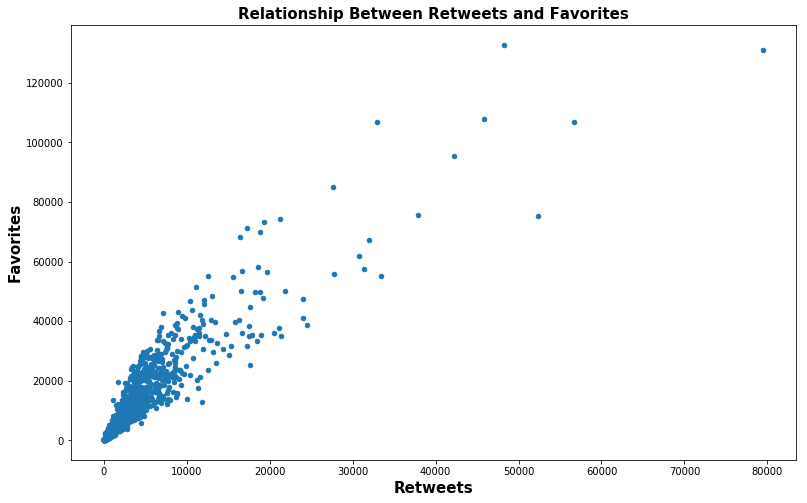

In [99]:
df.plot('retweet_count', 'favorite_count',kind='scatter',figsize=(13,8))
plt.title('Relationship Between Retweets and Favorites', fontsize=15,weight='bold')
plt.xlabel('Retweets',fontsize=15,weight='bold')
plt.ylabel('Favorites',fontsize=15,weight='bold');


From the scatter plot above, Favorite count and Retweet count have a strong positive correlation which suggests that tweets that are liked more are likely also to be retweeted more.

### Question 2: From which source are the most tweets made?

In [92]:
tweet_source = df.source.value_counts()

In [93]:
tweet_source

Twitter for iPhone     1894
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                10
Name: source, dtype: int64

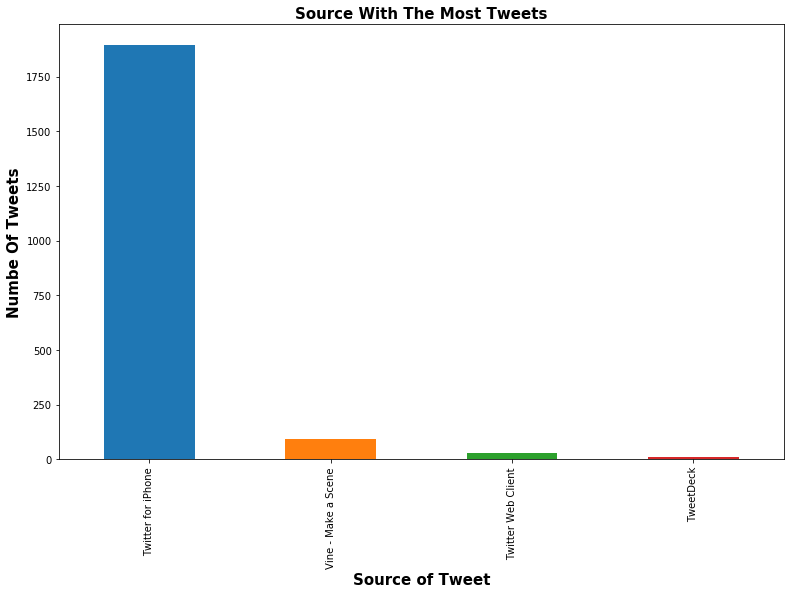

In [110]:
def Barploter(df,xlabel,ylabel,title):
    df.plot(kind='bar',figsize =(13,8))
    plt.xlabel(xlabel,fontsize=15,weight='bold')
    plt.ylabel(ylabel,fontsize=15,weight='bold')
    plt.title(title,fontsize=15,weight='bold')

Barploter(df=tweet_source,
          xlabel='Source of Tweet',
          ylabel='Numbe Of Tweets',
          title='Source With The Most Tweets')    






The majority of the tweets made were from iphones.

### Question 3: What is the most favorite dog breed?

In [105]:
best_breed = df.groupby('breed')['favorite_count'].mean().sort_values(ascending= False)

In [108]:
best_breed.head(10)

breed
Bedlington_terrier         24438.400000
Saluki                     24060.000000
French_bulldog             19055.172414
Bouvier_des_Flandres       18032.000000
Afghan_hound               17326.666667
black-and-tan_coonhound    17012.000000
Irish_water_spaniel        16400.000000
Leonberg                   14934.333333
standard_poodle            14823.000000
English_springer           14138.300000
Name: favorite_count, dtype: float64

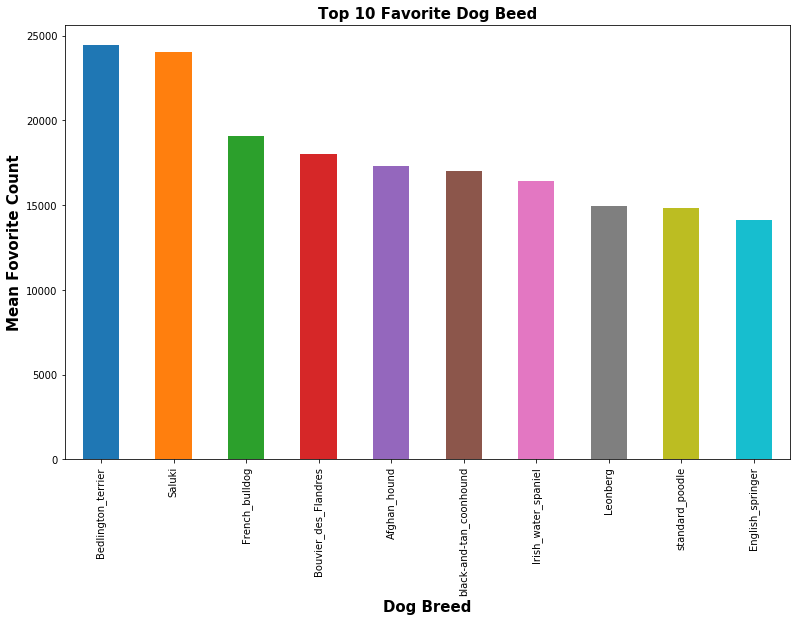

In [113]:
Barploter(df=best_breed.head(10),
          xlabel='Dog Breed',
          ylabel='Mean Fovorite Count',
          title='Top 10 Favorite Dog Beed')    


Based on the mean favorite count of all the dog breeds, Bedlington_terrier had the highest mean favorite count making it the favorite breed of all.